<a href="https://colab.research.google.com/github/chessterfries/project-c133/blob/main/Project_C133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
data_to_load = files.upload()

Saving gravitystar.csv to gravitystar.csv


In [6]:
import pandas as pd

df = pd.read_csv("gravitystar.csv")
print(df.head())

   Unnamed: 0       Star_name    Distance  Mass  Radius     Gravity
0           0             Sun    0.000016   1.0    1.00  274.269161
1           1          Sirius    8.600000   2.1    1.71  196.971800
2           2         Canopus  310.000000  15.0   71.00    0.816115
3           3  Alpha Centauri    4.400000   1.1    1.20  209.511165
4           4        Arcturus   37.000000   1.1   26.00    0.446296


In [7]:
star_radiuses = df["Mass"].tolist()
star_masses = df["Radius"].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


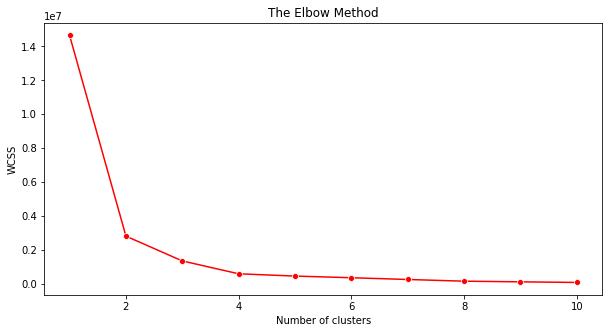

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = []

for index, star_mass in enumerate(star_masses):
  temp_list = [star_radiuses[index], star_mass]
  X.append(temp_list)

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()